In [2]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import *
import numpy as np
from functools import partial
os.chdir('..')
join = os.path.join(os.getcwd(), '_global')
sys.path.extend([join])
from _global.config import *
from _global.funcs import *
from object_detection.utils import dataset_util

In [3]:
# features = tf.train.Features(feature = {
#     'image/filename': tf.train.Feature(bytes_list = tf.train.BytesList(value = [bytes(filename, 'utf-8') ])),
#     'image/encoded': _bytes_feature(img_bytes),
#     'image/height':tf.train.Feature(int64_list = tf.train.Int64List(value = [IMAGE_SIZES[1]])),
#     'image/width':tf.train.Feature(int64_list = tf.train.Int64List(value = [IMAGE_SIZES[0]])),
#     'image/channels':tf.train.Feature(int64_list = tf.train.Int64List(value = [3])),
#     'image/format': tf.train.Feature(bytes_list = tf.train.BytesList(value = [bytes('jpeg', 'utf-8') ])),
#     'image/object/bbox/xmin': tf.train.Feature(float_list = tf.train.FloatList(value = x_min)),
#     'image/object/bbox/ymin': tf.train.Feature(float_list = tf.train.FloatList(value = y_min)),
#     'image/object/bbox/xmax': tf.train.Feature(float_list = tf.train.FloatList(value = x_max)),
#     'image/object/bbox/ymax': tf.train.Feature(float_list = tf.train.FloatList(value = y_max)),
#     'image/object/class/text': tf.train.Feature(bytes_list = tf.train.BytesList(value = label_texts)),
#     'image/object/class/label': tf.train.Feature(int64_list = tf.train.Int64List(value = labels)),
# })

FEATURE_DESCRIPTION = {
    'image/filename': tf.io.FixedLenFeature([],tf.string),
    'image/encoded' : tf.io.FixedLenFeature([], tf.string),
    'image/height' : tf.io.FixedLenFeature([1], tf.int64),
    'image/width' : tf.io.FixedLenFeature([1], tf.int64),
    'image/channels' : tf.io.FixedLenFeature([1], tf.int64),
    'image/format' : tf.io.FixedLenFeature([],tf.string), 
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32), 
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32), 
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32), 
    'image/object/class/text': tf.io.VarLenFeature(tf.string),
    'image/object/class/label' : tf.io.VarLenFeature(tf.int64),
}

In [4]:
def parse_function(example_proto):
    # Parse the input `tf.Example` proto using the dictionary above.
    example = tf.io.parse_single_example(example_proto, FEATURE_DESCRIPTION)
    image = tf.image.decode_jpeg(example['image/encoded'] , channels=3)
    image = tf.cast(image, tf.uint8)
    # print(image.shape)
    return image
    #   print(example['bbxs'])
    # bbxs = tf.cast(example['bbxs'], tf.int64)

    # if isinstance(bbxs, tf.SparseTensor):
    #     bbxs = tf.sparse.to_dense(bbxs)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


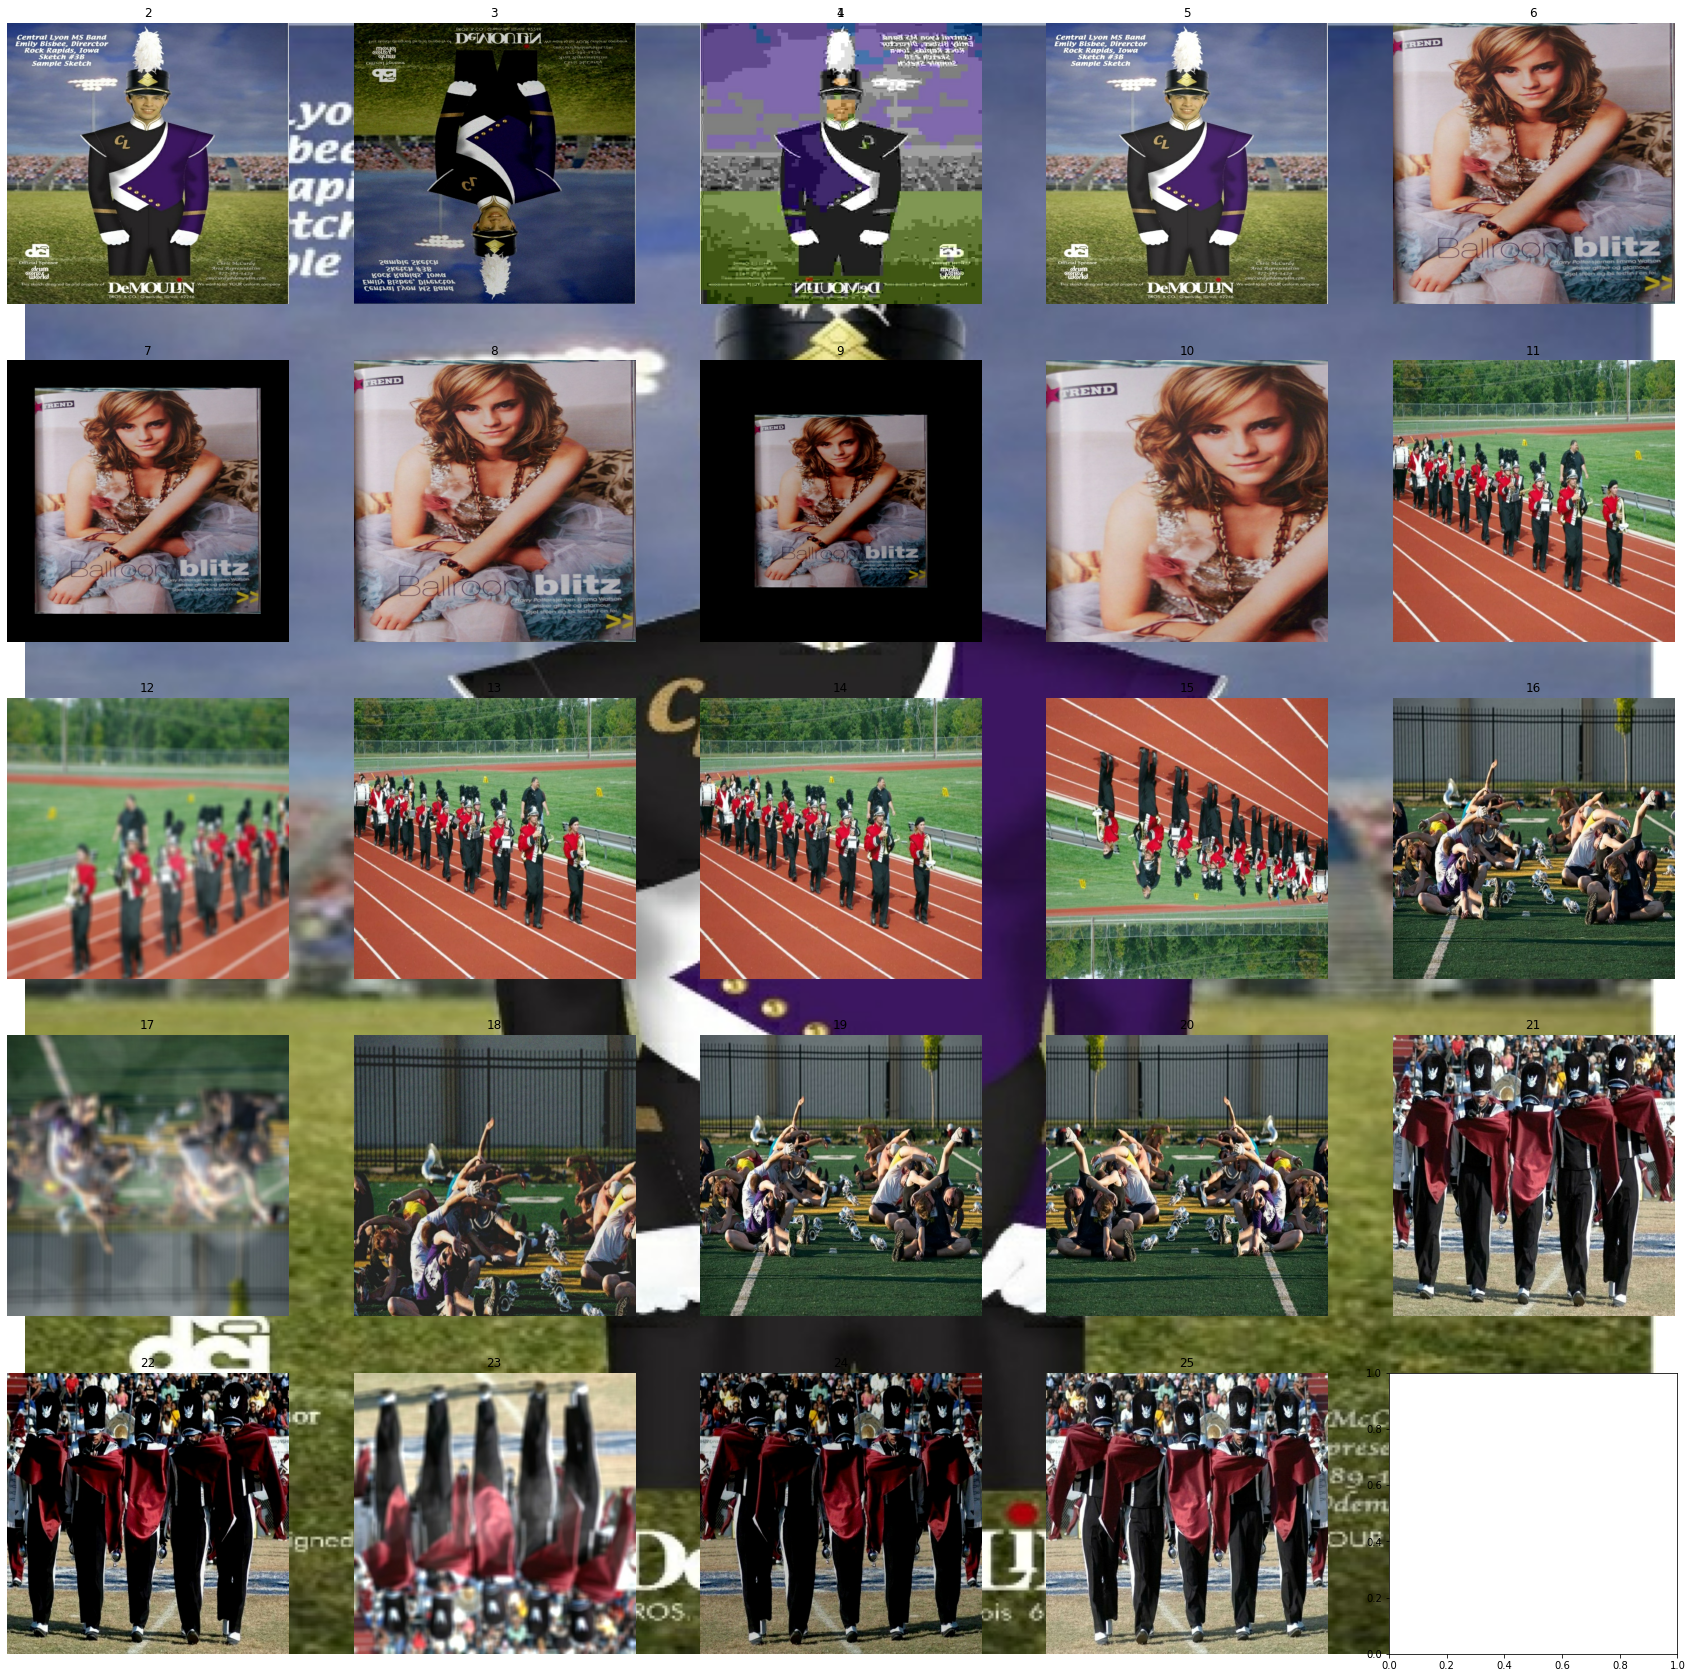

In [5]:
c = 1
fig = plt.figure(figsize=(30, 30))
rows = 5
columns = 5
for record in tf.compat.v1.python_io.tf_record_iterator(OUTPUT_TRAIN_TFRECORD):
    if c == 26: 
        break
    img = parse_function(record).numpy()
    plt.imsave(os.path.join(INSTALLATION_PATH, str(c) + ".jpeg"), img)
    plt.imshow(img)
    plt.axis('off')
    plt.title(c)
    fig.add_subplot(rows, columns, c)
    c += 1
plt.show(fig)